In [28]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#**Loading a pickled file**
There are a number of datatypes that cannot be saved easily to flat files, such as lists and dictionaries. If you want your files to be human readable, you may want to save them as text files in a clever manner. JSONs, which you will see in a later chapter, are appropriate for Python dictionaries.

However, if you merely want to be able to import them into Python, you can serialize them. All this means is converting the object into a sequence of bytes, or a bytestream.

In this exercise, you'll import the pickle package, open a previously pickled data structure from a file and load it.

In [5]:
# take user input to take the amount of data
number_of_data = int(input('Enter the number of data : '))
data = []

# take input of the data
for i in range(number_of_data):
    raw = input('Enter data '+str(i)+' : ')
    data.append(raw)

# open a file, where you ant to store the data
file = open('data.pkl', 'wb')

# dump information to that file
pickle.dump(data, file)

# close the file
file.close()

Enter the number of data : 3
Enter data 0 : 23
Enter data 1 : 345
Enter data 2 : 234


In [6]:
# Open pickle file and load data: d
with open('data.pkl', 'rb') as file:
    d = pickle.load(file)

# Print d
print(d)

# Print datatype of d
print(type(d))

['23', '345', '234']
<class 'list'>


#**Listing sheets in Excel files**
Whether you like it or not, any working data scientist will need to deal with Excel spreadsheets at some point in time. You won't always want to do so in Excel, however!

Here, you'll learn how to use pandas to import Excel spreadsheets and how to list the names of the sheets in any loaded .xlsx file.

Recall from the video that, given an Excel file imported into a variable spreadsheet, you can retrieve a list of the sheet names using the attribute spreadsheet.sheet_names.

Specifically, you'll be loading and checking out the spreadsheet 'battledeath.xlsx', modified from the Peace Research Institute Oslo's (PRIO) dataset. This data contains age-adjusted mortality rates due to war in various countries over several years.

In [7]:
# Assign spreadsheet filename: file
file = 'battledeath.xlsx'

# Load spreadsheet: xls
xls = pd.ExcelFile(file)

# Print sheet names
print(xls.sheet_names)

['2002', '2004']


#**Importing sheets from Excel files**
In the previous exercises, you saw that the Excel file contains two sheets, '2002' and '2004'. The next step is to import these.

In this exercise, you'll learn how to import any given sheet of your loaded .xlsx file as a DataFrame. You'll be able to do so by specifying either the sheet's name or its index.

In [8]:
# Load a sheet into a DataFrame by name: df1
df1 = xls.parse('2004')

# Print the head of the DataFrame df1
print(df1.head())

  War(country)      2004
0  Afghanistan  9.451028
1      Albania  0.130354
2      Algeria  3.407277
3      Andorra  0.000000
4       Angola  2.597931


In [9]:
# Load a sheet into a DataFrame by index: df2
df2 = xls.parse(0)

# Print the head of the DataFrame df2
print(df2.head())

  War, age-adjusted mortality due to       2002
0                        Afghanistan  36.083990
1                            Albania   0.128908
2                            Algeria  18.314120
3                            Andorra   0.000000
4                             Angola  18.964560


#**Customizing your spreadsheet import**
Here, you'll parse your spreadsheets and use additional arguments to skip rows, rename columns and select only particular columns.

The spreadsheet 'battledeath.xlsx' is already loaded as xls.

As before, you'll use the method parse(). This time, however, you'll add the additional arguments skiprows, names and usecols. These skip rows, name the columns and designate which columns to parse, respectively. All these arguments can be assigned to lists containing the specific row numbers, strings and column numbers, as appropriate

In [10]:
# Parse the first sheet and rename the columns: df1
df1 = xls.parse(0, skiprows=[0], names=['Country','AAM due to War (2002)'])

# Print the head of the DataFrame df1
print(df1.head())

               Country  AAM due to War (2002)
0              Albania               0.128908
1              Algeria              18.314120
2              Andorra               0.000000
3               Angola              18.964560
4  Antigua and Barbuda               0.000000


In [11]:

# Parse the first column of the second sheet and rename the column: df2
df2 = xls.parse(1, usecols=[0], skiprows=[0], names=['Country'])

# Print the head of the DataFrame df2
print(df2.head())

               Country
0              Albania
1              Algeria
2              Andorra
3               Angola
4  Antigua and Barbuda


#**Importing SAS files**
In this exercise, you'll figure out how to import a SAS file as a DataFrame using SAS7BDAT and pandas. The file 'sales.sas7bdat' is already in your working directory and both pandas and matplotlib.pyplot have already been imported as follows:

import pandas as pd
import matplotlib.pyplot as plt
The data are adapted from the website of the undergraduate text book Principles of Econometrics by Hill, Griffiths and Lim

In [12]:
# Import sas7bdat package
!pip install sas7bdat

from sas7bdat import SAS7BDAT

# Save file to a DataFrame: df_sas
with SAS7BDAT('sales.sas7bdat') as file:
    df_sas = file.to_data_frame()

# Print head of DataFrame
print(df_sas.head())

     YEAR     P           S
0  1950.0  12.9  181.899994
1  1951.0  11.9  245.000000
2  1952.0  10.7  250.199997
3  1953.0  11.3  265.899994
4  1954.0  11.2  248.500000


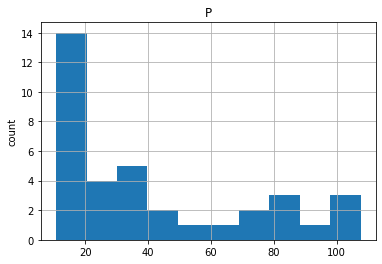

In [13]:
# Plot histogram of DataFrame features (pandas and pyplot already imported)
pd.DataFrame.hist(df_sas[['P']])
plt.ylabel('count')
plt.show()

#**Importing Stata files**
Here, you'll gain expertise in importing Stata files as DataFrames using the pd.read_stata() function from pandas. The last exercise's file, 'disarea.dta', is still in your working directory.

In [14]:
# Load Stata file into a pandas DataFrame: df
df = pd.read_stata('disarea.dta')

# Print the head of the DataFrame df
print(df.head())

  wbcode               country  disa1  disa2  disa3  disa4  disa5  disa6  \
0    AFG           Afghanistan   0.00   0.00   0.76   0.73    0.0   0.00   
1    AGO                Angola   0.32   0.02   0.56   0.00    0.0   0.00   
2    ALB               Albania   0.00   0.00   0.02   0.00    0.0   0.00   
3    ARE  United Arab Emirates   0.00   0.00   0.00   0.00    0.0   0.00   
4    ARG             Argentina   0.00   0.24   0.24   0.00    0.0   0.23   

   disa7  disa8  ...  disa16  disa17  disa18  disa19  disa20  disa21  disa22  \
0   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
1   0.56    0.0  ...     0.0     0.4     0.0    0.61    0.00     0.0    0.99   
2   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
3   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
4   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.05     0.0    0.00   

   disa23  disa24  disa25  
0    0.02    0.00    0.00  
1    0

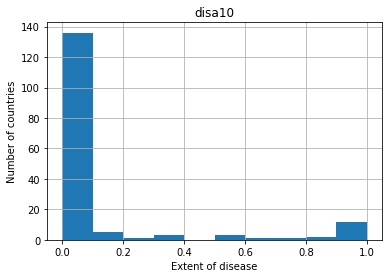

In [15]:
# Plot histogram of one column of the DataFrame
pd.DataFrame.hist(df[['disa10']])
plt.xlabel('Extent of disease')
plt.ylabel('Number of countries')
plt.show()

#**Using h5py to import HDF5 files**
The file 'LIGO_data.hdf5' is already in your working directory. In this exercise, you'll import it using the h5py library. You'll also print out its datatype to confirm you have imported it correctly. You'll then study the structure of the file in order to see precisely what HDF groups it contains.

In [19]:
!pip install h5py

In [20]:
import h5py

In [23]:
# Assign filename: file
file = 'L-L1_LOSC_4_V1-1126259446-32.hdf5'

# Load file: data
data = h5py.File(file, 'r')

# Print the datatype of the loaded file
print(type(data))

# Print the keys of the file
for key in data.keys():
    print(key)

<class 'h5py._hl.files.File'>
meta
quality
strain


#**Extracting data from your HDF5 file**
In this exercise, you'll extract some of the LIGO experiment's actual data from the HDF5 file and you'll visualize it.

To do so, you'll need to first explore the HDF5 group 'strain'.

In [25]:
# Get the HDF5 group: group
group = data['strain']

# Check out keys of group
for key in group.keys():
    print(key)

# Set variable equal to time series data: strain
strain = data['strain']['Strain']

print(strain)

Strain
<HDF5 dataset "Strain": shape (131072,), type "<f8">


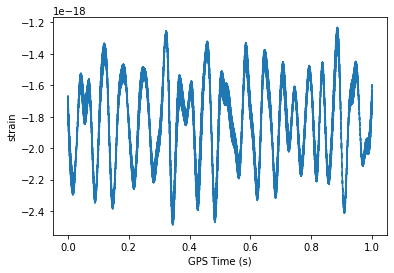

In [29]:
# Set number of time points to sample: num_samples
num_samples = 10000

# Set time vector
time = np.arange(0, 1, 1/num_samples)

# Plot data
plt.plot(time, strain[:num_samples])
plt.xlabel('GPS Time (s)')
plt.ylabel('strain')
plt.show()